In [1]:
!pip install pandas

  Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
      Successfully uninstalled numpy-1.15.1


  Cache entry deserialization failed, entry ignored
mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.19.5 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 58.0.4 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn

  Cache entry deserialization failed, entry ignored
mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.19.5 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 58.0.4 which is incompatible.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('c:/11-computer_vision/cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


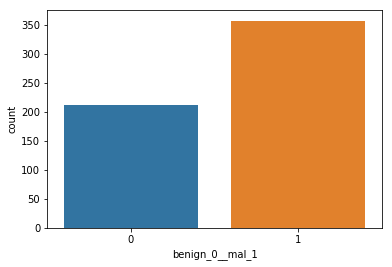

In [11]:
sns.countplot(x='benign_0__mal_1', data=df)

In [15]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
MinMaxScaler(copy=True, feature_range=(0,1))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model=Sequential()
model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/step - loss: 0.6710 - val_loss: 0.6526
Epoch 2/600
426/426 [==============================] - 0s 165us/step - loss: 0.6316 - val_loss: 0.6118
Epoch 3/600
426/426 [==============================] - 0s 189us/step - loss: 0.5898 - val_loss: 0.5645
Epoch 4/600
426/426 [==============================] - 0s 167us/step - loss: 0.5442 - val_loss: 0.5153
Epoch 5/600
426/426 [==============================] - 0s 157us/step - loss: 0.4935 - val_loss: 0.4596
Epoch 6/600
426/426 [==============================] - 0s 176us/step - loss: 0.4386 - val_loss: 0.3982
Epoch 7/600
426/426 [==============================] - 0s 180us/step - loss: 0.3809 - val_loss: 0.3386
Epoch 8/600
426/426 [==============================] - 0s 180us/step - loss: 0.3315 - val_loss: 0.2942
Epoch 9/600
426/426 [==============================] - 0s 187us/step - loss: 0.2966 - val_loss: 0.2586
Epoch 10/600
426/426 [=======

426/426 [==============================] - 0s 172us/step - loss: 0.0547 - val_loss: 0.1124
Epoch 80/600
426/426 [==============================] - 0s 202us/step - loss: 0.0534 - val_loss: 0.1027
Epoch 81/600
426/426 [==============================] - 0s 136us/step - loss: 0.0504 - val_loss: 0.1054
Epoch 82/600
426/426 [==============================] - 0s 169us/step - loss: 0.0510 - val_loss: 0.1056
Epoch 83/600
426/426 [==============================] - 0s 156us/step - loss: 0.0493 - val_loss: 0.1051
Epoch 84/600
426/426 [==============================] - 0s 137us/step - loss: 0.0493 - val_loss: 0.1068
Epoch 85/600
426/426 [==============================] - 0s 175us/step - loss: 0.0504 - val_loss: 0.1042
Epoch 86/600
426/426 [==============================] - 0s 171us/step - loss: 0.0497 - val_loss: 0.1059
Epoch 87/600
426/426 [==============================] - 0s 158us/step - loss: 0.0492 - val_loss: 0.1030
Epoch 88/600
426/426 [==============================] - 0s 166us/step - loss:

426/426 [==============================] - 0s 160us/step - loss: 0.0408 - val_loss: 0.1156
Epoch 158/600
426/426 [==============================] - 0s 155us/step - loss: 0.0423 - val_loss: 0.1197
Epoch 159/600
426/426 [==============================] - 0s 159us/step - loss: 0.0449 - val_loss: 0.1235
Epoch 160/600
426/426 [==============================] - 0s 161us/step - loss: 0.0411 - val_loss: 0.1248
Epoch 161/600
426/426 [==============================] - 0s 150us/step - loss: 0.0404 - val_loss: 0.1136
Epoch 162/600
426/426 [==============================] - 0s 160us/step - loss: 0.0410 - val_loss: 0.1208
Epoch 163/600
426/426 [==============================] - 0s 159us/step - loss: 0.0417 - val_loss: 0.1255
Epoch 164/600
426/426 [==============================] - 0s 147us/step - loss: 0.0418 - val_loss: 0.1250
Epoch 165/600
426/426 [==============================] - 0s 157us/step - loss: 0.0472 - val_loss: 0.1141
Epoch 166/600
426/426 [==============================] - 0s 150us/ste

Epoch 235/600
426/426 [==============================] - 0s 178us/step - loss: 0.0346 - val_loss: 0.1382
Epoch 236/600
426/426 [==============================] - 0s 176us/step - loss: 0.0350 - val_loss: 0.1294
Epoch 237/600
426/426 [==============================] - 0s 162us/step - loss: 0.0349 - val_loss: 0.1343
Epoch 238/600
426/426 [==============================] - 0s 161us/step - loss: 0.0346 - val_loss: 0.1344
Epoch 239/600
426/426 [==============================] - 0s 143us/step - loss: 0.0389 - val_loss: 0.1192
Epoch 240/600
426/426 [==============================] - 0s 175us/step - loss: 0.0368 - val_loss: 0.1291
Epoch 241/600
426/426 [==============================] - 0s 151us/step - loss: 0.0336 - val_loss: 0.1400
Epoch 242/600
426/426 [==============================] - 0s 182us/step - loss: 0.0335 - val_loss: 0.1261
Epoch 243/600
426/426 [==============================] - 0s 170us/step - loss: 0.0342 - val_loss: 0.1564
Epoch 244/600
426/426 [==============================] 

426/426 [==============================] - 0s 148us/step - loss: 0.0362 - val_loss: 0.1637
Epoch 314/600
426/426 [==============================] - 0s 153us/step - loss: 0.0291 - val_loss: 0.1421
Epoch 315/600
426/426 [==============================] - 0s 133us/step - loss: 0.0279 - val_loss: 0.1499
Epoch 316/600
426/426 [==============================] - 0s 199us/step - loss: 0.0291 - val_loss: 0.1507
Epoch 317/600
426/426 [==============================] - 0s 157us/step - loss: 0.0286 - val_loss: 0.1409
Epoch 318/600
426/426 [==============================] - 0s 198us/step - loss: 0.0284 - val_loss: 0.1486
Epoch 319/600
426/426 [==============================] - 0s 176us/step - loss: 0.0272 - val_loss: 0.1375
Epoch 320/600
426/426 [==============================] - 0s 146us/step - loss: 0.0299 - val_loss: 0.1839
Epoch 321/600
426/426 [==============================] - 0s 155us/step - loss: 0.0350 - val_loss: 0.1333
Epoch 322/600
426/426 [==============================] - 0s 187us/ste

426/426 [==============================] - 0s 143us/step - loss: 0.0244 - val_loss: 0.1639
Epoch 392/600
426/426 [==============================] - 0s 145us/step - loss: 0.0245 - val_loss: 0.1472
Epoch 393/600
426/426 [==============================] - 0s 168us/step - loss: 0.0232 - val_loss: 0.1625
Epoch 394/600
426/426 [==============================] - 0s 144us/step - loss: 0.0240 - val_loss: 0.1682
Epoch 395/600
426/426 [==============================] - 0s 155us/step - loss: 0.0241 - val_loss: 0.1436
Epoch 396/600
426/426 [==============================] - 0s 159us/step - loss: 0.0236 - val_loss: 0.1628
Epoch 397/600
426/426 [==============================] - 0s 151us/step - loss: 0.0229 - val_loss: 0.1804
Epoch 398/600
426/426 [==============================] - 0s 145us/step - loss: 0.0335 - val_loss: 0.1427
Epoch 399/600
426/426 [==============================] - 0s 146us/step - loss: 0.0308 - val_loss: 0.2057
Epoch 400/600
426/426 [==============================] - 0s 159us/ste

426/426 [==============================] - 0s 196us/step - loss: 0.0210 - val_loss: 0.2117
Epoch 470/600
426/426 [==============================] - 0s 170us/step - loss: 0.0164 - val_loss: 0.1704
Epoch 471/600
426/426 [==============================] - 0s 153us/step - loss: 0.0173 - val_loss: 0.1802
Epoch 472/600
426/426 [==============================] - 0s 149us/step - loss: 0.0169 - val_loss: 0.1710
Epoch 473/600
426/426 [==============================] - 0s 157us/step - loss: 0.0173 - val_loss: 0.1759
Epoch 474/600
426/426 [==============================] - 0s 184us/step - loss: 0.0158 - val_loss: 0.1807
Epoch 475/600
426/426 [==============================] - 0s 141us/step - loss: 0.0166 - val_loss: 0.1633
Epoch 476/600
426/426 [==============================] - 0s 145us/step - loss: 0.0178 - val_loss: 0.1941
Epoch 477/600
426/426 [==============================] - 0s 150us/step - loss: 0.0191 - val_loss: 0.1562
Epoch 478/600
426/426 [==============================] - 0s 144us/ste

426/426 [==============================] - 0s 226us/step - loss: 0.0137 - val_loss: 0.1917
Epoch 548/600
426/426 [==============================] - 0s 131us/step - loss: 0.0134 - val_loss: 0.2107
Epoch 549/600
426/426 [==============================] - 0s 164us/step - loss: 0.0112 - val_loss: 0.2127
Epoch 550/600
426/426 [==============================] - 0s 174us/step - loss: 0.0112 - val_loss: 0.2154
Epoch 551/600
426/426 [==============================] - 0s 145us/step - loss: 0.0114 - val_loss: 0.2093
Epoch 552/600
426/426 [==============================] - 0s 145us/step - loss: 0.0116 - val_loss: 0.1924
Epoch 553/600
426/426 [==============================] - 0s 146us/step - loss: 0.0164 - val_loss: 0.2802
Epoch 554/600
426/426 [==============================] - 0s 148us/step - loss: 0.0118 - val_loss: 0.1980
Epoch 555/600
426/426 [==============================] - 0s 182us/step - loss: 0.0120 - val_loss: 0.2067
Epoch 556/600
426/426 [==============================] - 0s 156us/ste

In [ ]:
model.history.history

In [ ]:
model_loss=pd.DataFrame(model.history.history)

In [ ]:
model_loss.plot()

In [ ]:
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
stop training when a monitored quantity has sto

In [ ]:
early_stop =EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1,
         callbacks=[early_stop])

In [ ]:
model_loss=pd.DataFrame(model.history.history)

In [ ]:
from tensorflow.keras.layers import DRopout
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimize='adam')

In [27]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1,
         )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 120us/step - loss: 0.0081 - val_loss: 0.2209
Epoch 2/600
426/426 [==============================] - 0s 132us/step - loss: 0.0100 - val_loss: 0.2882
Epoch 3/600
426/426 [==============================] - 0s 135us/step - loss: 0.0098 - val_loss: 0.2159
Epoch 4/600
426/426 [==============================] - 0s 137us/step - loss: 0.0086 - val_loss: 0.2772
Epoch 5/600
426/426 [==============================] - 0s 126us/step - loss: 0.0084 - val_loss: 0.2217
Epoch 6/600
426/426 [==============================] - 0s 115us/step - loss: 0.0084 - val_loss: 0.2447
Epoch 7/600
426/426 [==============================] - 0s 134us/step - loss: 0.0080 - val_loss: 0.2577
Epoch 8/600
426/426 [==============================] - 0s 148us/step - loss: 0.0086 - val_loss: 0.2333
Epoch 9/600
426/426 [==============================] - 0s 135us/step - loss: 0.0072 - val_loss: 0.2425
Epoch 10/600
426/426 [=====

426/426 [==============================] - 0s 149us/step - loss: 0.0045 - val_loss: 0.2861
Epoch 80/600
426/426 [==============================] - 0s 124us/step - loss: 0.0051 - val_loss: 0.2977
Epoch 81/600
426/426 [==============================] - 0s 135us/step - loss: 0.0050 - val_loss: 0.2893
Epoch 82/600
426/426 [==============================] - 0s 147us/step - loss: 0.0042 - val_loss: 0.2940
Epoch 83/600
426/426 [==============================] - 0s 147us/step - loss: 0.0046 - val_loss: 0.2960
Epoch 84/600
426/426 [==============================] - 0s 172us/step - loss: 0.0042 - val_loss: 0.2836
Epoch 85/600
426/426 [==============================] - 0s 147us/step - loss: 0.0054 - val_loss: 0.2955
Epoch 86/600
426/426 [==============================] - 0s 158us/step - loss: 0.0045 - val_loss: 0.3057
Epoch 87/600
426/426 [==============================] - 0s 148us/step - loss: 0.0045 - val_loss: 0.2922
Epoch 88/600
426/426 [==============================] - 0s 148us/step - loss:

426/426 [==============================] - 0s 234us/step - loss: 0.0029 - val_loss: 0.3431
Epoch 158/600
426/426 [==============================] - 0s 216us/step - loss: 0.0039 - val_loss: 0.4116
Epoch 159/600
426/426 [==============================] - 0s 271us/step - loss: 0.0034 - val_loss: 0.3637
Epoch 160/600
426/426 [==============================] - 0s 210us/step - loss: 0.0025 - val_loss: 0.3576
Epoch 161/600
426/426 [==============================] - 0s 197us/step - loss: 0.0032 - val_loss: 0.3883
Epoch 162/600
426/426 [==============================] - 0s 252us/step - loss: 0.0025 - val_loss: 0.3502
Epoch 163/600
426/426 [==============================] - 0s 208us/step - loss: 0.0030 - val_loss: 0.3585
Epoch 164/600
426/426 [==============================] - 0s 193us/step - loss: 0.0027 - val_loss: 0.3744
Epoch 165/600
426/426 [==============================] - 0s 148us/step - loss: 0.0027 - val_loss: 0.3639
Epoch 166/600
426/426 [==============================] - 0s 148us/ste

426/426 [==============================] - 0s 131us/step - loss: 0.0022 - val_loss: 0.4081
Epoch 236/600
426/426 [==============================] - 0s 147us/step - loss: 0.0015 - val_loss: 0.4182
Epoch 237/600
426/426 [==============================] - 0s 181us/step - loss: 0.0017 - val_loss: 0.4265
Epoch 238/600
426/426 [==============================] - 0s 139us/step - loss: 0.0024 - val_loss: 0.4049
Epoch 239/600
426/426 [==============================] - 0s 181us/step - loss: 0.0018 - val_loss: 0.3974
Epoch 240/600
426/426 [==============================] - 0s 167us/step - loss: 0.0020 - val_loss: 0.4082
Epoch 241/600
426/426 [==============================] - 0s 207us/step - loss: 0.0015 - val_loss: 0.4140
Epoch 242/600
426/426 [==============================] - 0s 145us/step - loss: 0.0014 - val_loss: 0.4152
Epoch 243/600
426/426 [==============================] - 0s 176us/step - loss: 0.0015 - val_loss: 0.4187
Epoch 244/600
426/426 [==============================] - 0s 184us/ste

426/426 [==============================] - 0s 226us/step - loss: 8.8673e-04 - val_loss: 0.4433
Epoch 313/600
426/426 [==============================] - 0s 327us/step - loss: 9.7022e-04 - val_loss: 0.4799
Epoch 314/600
426/426 [==============================] - 0s 278us/step - loss: 0.0016 - val_loss: 0.5501
Epoch 315/600
426/426 [==============================] - 0s 242us/step - loss: 0.0023 - val_loss: 0.4940
Epoch 316/600
426/426 [==============================] - 0s 222us/step - loss: 0.0014 - val_loss: 0.4670
Epoch 317/600
426/426 [==============================] - 0s 171us/step - loss: 0.0015 - val_loss: 0.4271
Epoch 318/600
426/426 [==============================] - 0s 188us/step - loss: 8.8819e-04 - val_loss: 0.4791
Epoch 319/600
426/426 [==============================] - 0s 146us/step - loss: 9.5426e-04 - val_loss: 0.4618
Epoch 320/600
426/426 [==============================] - 0s 150us/step - loss: 9.0782e-04 - val_loss: 0.4447
Epoch 321/600
426/426 [==========================

426/426 [==============================] - 0s 180us/step - loss: 7.9305e-04 - val_loss: 0.5082
Epoch 389/600
426/426 [==============================] - 0s 219us/step - loss: 7.8371e-04 - val_loss: 0.5115
Epoch 390/600
426/426 [==============================] - 0s 182us/step - loss: 7.7059e-04 - val_loss: 0.5113
Epoch 391/600
426/426 [==============================] - 0s 191us/step - loss: 7.6208e-04 - val_loss: 0.5122
Epoch 392/600
426/426 [==============================] - 0s 189us/step - loss: 7.7757e-04 - val_loss: 0.5060
Epoch 393/600
426/426 [==============================] - 0s 206us/step - loss: 7.4336e-04 - val_loss: 0.5136
Epoch 394/600
426/426 [==============================] - 0s 148us/step - loss: 7.3843e-04 - val_loss: 0.5131
Epoch 395/600
426/426 [==============================] - 0s 169us/step - loss: 7.3030e-04 - val_loss: 0.5075
Epoch 396/600
426/426 [==============================] - 0s 172us/step - loss: 7.4056e-04 - val_loss: 0.5094
Epoch 397/600
426/426 [==========

426/426 [==============================] - 0s 146us/step - loss: 5.4635e-04 - val_loss: 0.5174
Epoch 464/600
426/426 [==============================] - 0s 145us/step - loss: 5.2896e-04 - val_loss: 0.5117
Epoch 465/600
426/426 [==============================] - 0s 159us/step - loss: 5.4947e-04 - val_loss: 0.5109
Epoch 466/600
426/426 [==============================] - 0s 187us/step - loss: 5.3839e-04 - val_loss: 0.5218
Epoch 467/600
426/426 [==============================] - 0s 146us/step - loss: 5.5882e-04 - val_loss: 0.5150
Epoch 468/600
426/426 [==============================] - 0s 164us/step - loss: 5.5669e-04 - val_loss: 0.5121
Epoch 469/600
426/426 [==============================] - 0s 168us/step - loss: 5.2110e-04 - val_loss: 0.5228
Epoch 470/600
426/426 [==============================] - 0s 161us/step - loss: 5.5343e-04 - val_loss: 0.5125
Epoch 471/600
426/426 [==============================] - 0s 153us/step - loss: 5.4488e-04 - val_loss: 0.5237
Epoch 472/600
426/426 [==========

426/426 [==============================] - 0s 185us/step - loss: 4.2249e-04 - val_loss: 0.5283
Epoch 539/600
426/426 [==============================] - 0s 185us/step - loss: 4.2592e-04 - val_loss: 0.5138
Epoch 540/600
426/426 [==============================] - 0s 189us/step - loss: 4.9799e-04 - val_loss: 0.5167
Epoch 541/600
426/426 [==============================] - 0s 162us/step - loss: 4.5969e-04 - val_loss: 0.5165
Epoch 542/600
426/426 [==============================] - 0s 214us/step - loss: 4.5693e-04 - val_loss: 0.5265
Epoch 543/600
426/426 [==============================] - 0s 152us/step - loss: 4.1417e-04 - val_loss: 0.5134
Epoch 544/600
426/426 [==============================] - 0s 167us/step - loss: 4.2784e-04 - val_loss: 0.5221
Epoch 545/600
426/426 [==============================] - 0s 211us/step - loss: 4.2076e-04 - val_loss: 0.5180
Epoch 546/600
426/426 [==============================] - 0s 152us/step - loss: 4.0702e-04 - val_loss: 0.5178
Epoch 547/600
426/426 [==========

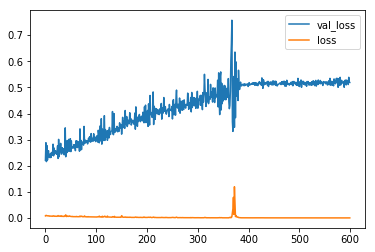

In [28]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
y_prob=model.predict(X_test)

predictions=(y_prob>0.5).astype(int)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91        55
          1       0.98      0.91      0.94        88

avg / total       0.93      0.93      0.93       143

[[53  2]
 [ 8 80]]
